# Visualize learned alpha values

This notebook visualizes the learned $\alpha$ values of the $\alpha$-entmax model. The visualizations are used in the thesis report

In [41]:
import os
import re
import sys
import json
import random
random.seed(42)
from typing import Optional, Any
import warnings
warnings.filterwarnings("ignore")
from pathlib import Path

package_root = os.path.dirname(os.getcwd())
sys.path.insert(0, package_root)

import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
plt.rcParams["savefig.bbox"] = 'tight'
import matplotlib.patches as patches
import seaborn as sns
from matplotlib.ticker import StrMethodFormatter

sns.set(font_scale=1.4)
sns.set_style("whitegrid", {
    "grid.linestyle": 'dashed',
    "axes.edgecolor": '#475569',
    'font.family': ['sans-serif'],
    'font.sans-serif': ['Arial',
        'Droid Sans',
        'sans-serif'
    ],
})
%matplotlib inline

In [53]:
def plot_alphas_for_layer(layer: int = 0, save_output: bool = False):
    print("Read values from CSV file")
    file_path = Path(package_root) / "outputs" / "alpha_values" / f"a-entmax_alpha_layer_{layer}.csv"
    raw_df = pd.read_csv(file_path)

    print("Clean up column headers")
    columns = [f"v2_decoder_a-entmax_alpha-lr=1e-3 - train-metrics/alpha/layer_{layer}-head_{i}" for i in range(8)]
    df = raw_df[columns]
    rename_column = {f"v2_decoder_a-entmax_alpha-lr=1e-3 - train-metrics/alpha/layer_{layer}-head_{i}": f"head_{i}" for i in range(8)}
    df.rename(columns=rename_column, inplace=True)

    print("Plotting alpha values")
    fig, ax = plt.subplots(figsize=(8, 5))
    df.plot(ax=ax)
    ax.set_xlabel("Training step")
    ax.set_ylabel(r"$\alpha$")
    ax.set_xticklabels(ax.get_xticks(), rotation = 45)
    ax.grid(False)
    plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}')) # No decimal places

    if save_output:
        fig.savefig(f"images/alpha_values/alphas_layer_{layer}.png", bbox_inches="tight")
        fig.savefig(f"images/alpha_values/alphas_layer_{layer}.pdf", bbox_inches="tight")

Read values from CSV file
Clean up column headers
Plotting alpha values
Read values from CSV file
Clean up column headers
Plotting alpha values
Read values from CSV file
Clean up column headers
Plotting alpha values
Read values from CSV file
Clean up column headers
Plotting alpha values
Read values from CSV file
Clean up column headers
Plotting alpha values
Read values from CSV file
Clean up column headers
Plotting alpha values


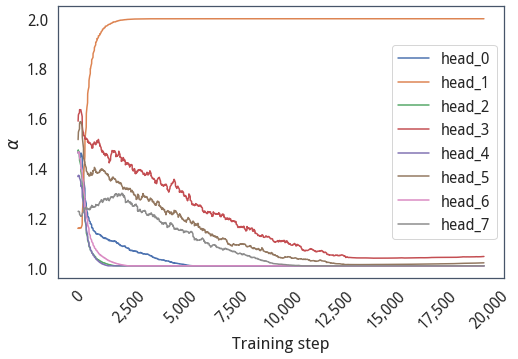

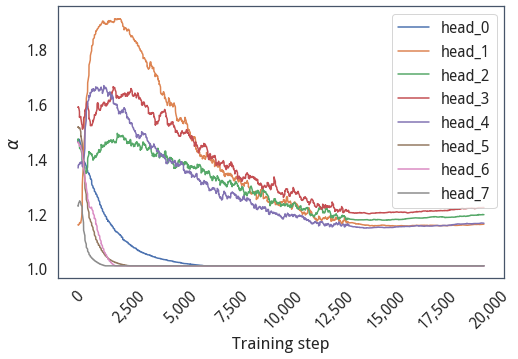

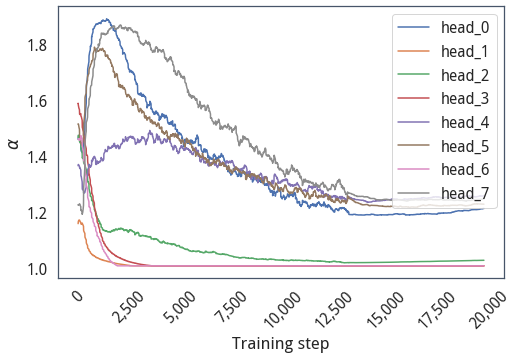

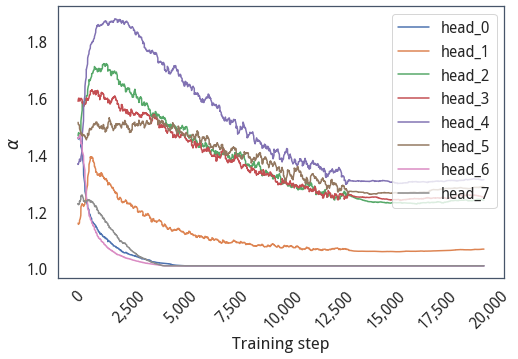

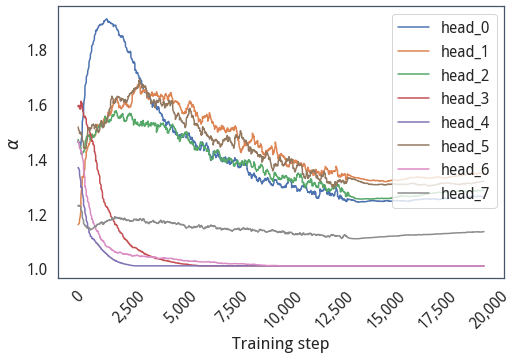

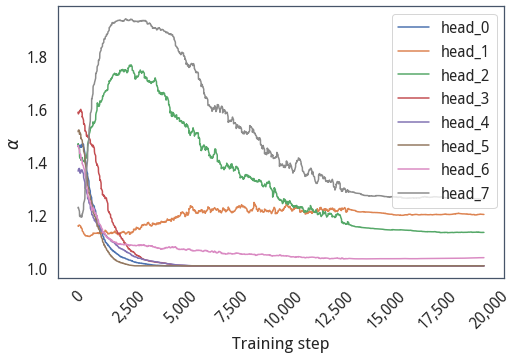

In [54]:
for l in range(6):
    plot_alphas_for_layer(layer=l, save_output=True)